In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
eyes_cascade        = cv2.CascadeClassifier('third-party/frontalEyes35x16.xml')
nose_cascade        = cv2.CascadeClassifier('third-party/Nose18x15.xml')
img                 = cv2.imread('Before.png', -1)
image               = cv2.cvtColor(img,cv2.COLOR_BGRA2RGBA)
glasses             = cv2.imread('glasses.png', -1)
mustache            = cv2.imread('mustache.png',-1)

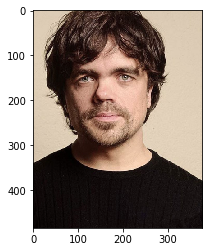

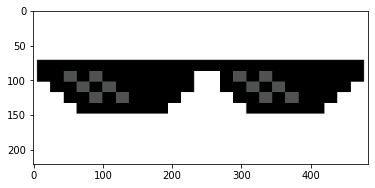

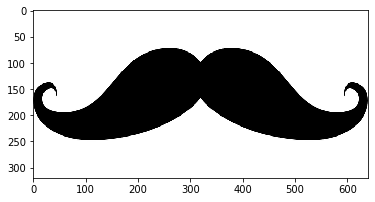

In [3]:
plt.imshow(image)
plt.show()
plt.imshow(glasses)
plt.show()
plt.imshow(mustache)
plt.show()

In [4]:
eye = eyes_cascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5)
eye[0]

array([ 82, 111, 162,  74], dtype=int32)

In [5]:
ex, ey, ew, eh = eye[0]
#cv2.rectangle(img, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 3)

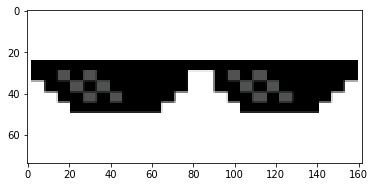

In [6]:
glasses = cv2.resize(glasses, (ew,eh))
plt.imshow(glasses)
plt.show()

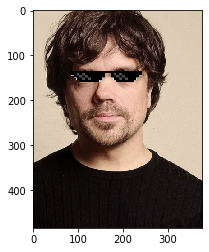

In [7]:
for i in range(0, eh):
    for j in range(0, ew):
        if glasses[i, j][3] != 0:
            image[ey + i, ex + j] = glasses[i, j]
plt.imshow(image)
plt.show()

In [8]:
nose = nose_cascade.detectMultiScale(image, scaleFactor=1.3, minNeighbors=5)
nose[0]

array([124, 168,  61,  51], dtype=int32)

In [9]:
nx, ny, nw, nh = nose[0]
#cv2.rectangle(img, (nx, ny), (nx + nw, ny + nh), (255, 0, 0), 3)

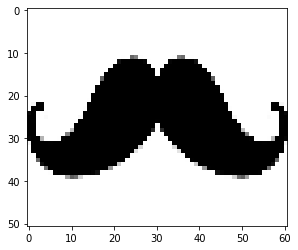

In [10]:
mustache = cv2.resize(mustache, (nw,nh))
plt.imshow(mustache)
plt.show()

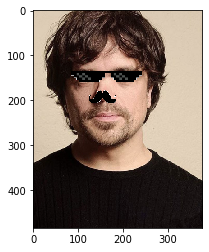

In [11]:
for i in range(0, nh):
    for j in range(0, nw):
        if mustache[i, j][3] != 0:
            image[ny + i, nx + j] = mustache[i, j]
plt.imshow(image)
plt.show()

In [12]:
image.shape


(485, 377, 4)

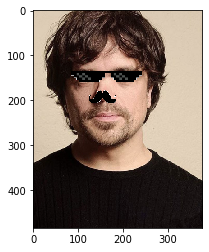

In [13]:
plt.imshow(image)
plt.show()

In [14]:
final_image=image[:,:,0:3]

In [16]:
final_image = cv2.cvtColor(final_image,cv2.COLOR_RGB2BGR)

In [18]:
final_image = final_image.reshape((-1,3))

In [19]:
final_image

array([[180, 202, 219],
       [181, 203, 220],
       [180, 202, 219],
       ...,
       [ 13,  13,  19],
       [ 15,  15,  21],
       [ 15,  15,  22]], dtype=uint8)

In [20]:
df=pd.DataFrame(final_image,columns=["Channel 1","Channel 2","Channel 3"])

In [21]:
df.head(5)

,Channel 1,Channel 2,Channel 3
0,180,202,219
1,181,203,220
2,180,202,219
3,181,203,220
4,180,202,219


In [22]:
df.to_csv('After.csv',index=False)

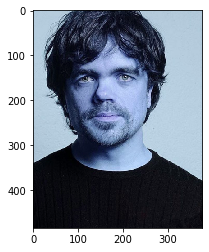

In [26]:
plt.imshow(img)
plt.show()

In [27]:
img=cv2.cvtColor(img,cv2.COLOR_BGRA2RGBA)

In [28]:
img=img[:,:,0:3]

In [29]:
img=img.flatten()

In [30]:
flat_img=img.reshape((-1,3))

In [32]:
flat_img.shape

(182845, 3)

In [33]:
df1=pd.DataFrame(flat_img,columns=["Channel 1","Channel 2","Channel 3"])

In [34]:
df1.to_csv('Before.csv',index=False)